The idea of Laplace approximation is to approximate an intractable probability distribution p(x) with a Gaussian distribution q(x)
1. Apply Taylor expansion of log p(x) around the mode of the distribution, so that

$$q(x)=p(x0)\exp(-c/2(x-x0)^2)$$

where $c=-H$ is the curvature of the $\log p(x)$ at the mode $x0$

2. Approximate the normalizing constant Z by the normalizing constant of the Gaussian distribution (i.e., Z = integral q(x)dx)
$$Z=p(x_0)\sqrt{\frac{2\pi}{c}}$$
or, for K-dimensional space,
$$Z=p(x_0)\sqrt{\frac{(2\pi)^K}{\det(-H)}}$$

Reference
- https://github.com/philipphennig/ProbML_Apps/blob/main/03/pages/02_Beta_Inference.py
- https://forem.julialang.org/mroavi/the-laplace-approximation-part-2-3hg6

theta_modea: 0.7102272727272727, H: -85.51805490196081, H_estimated: -85.51805114746094, var_hat: 0.10813619941473007


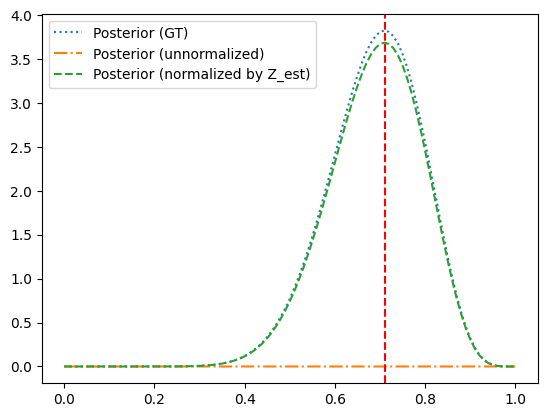

In [20]:
import matplotlib.pyplot as plt
from jax.scipy.stats import norm, beta
from jax.scipy.special import beta as beta_function

import jax
from jax import numpy as jnp

# beta function B(theta, a, b)
# def beta_function(a, b):
#     return theta**(a-1) * (1-theta)**(b-1)

# draw beta distribution
def draw_beta(a, b):
    x = [i/100 for i in range(101)]
    y = [beta(i, a, b) for i in x]
    plt.plot(x, y, label='a={}, b={}'.format(a, b))
    plt.show()

N = 100

# observation model
n, m = 13, 6 # success, failure

# prior
a0, b0 = 0.5, 0.1 # 

# posterior
a, b = a0 + n, b0 + m # number of success and failures

# hessian
theta_mode = (a-1) / (a+b-2)
H = -(a+b-2)**2 * ( 1.0 / (a-1.0) + 1.0 / (b-1.0) )
H_estimated = jax.hessian(lambda x: beta.logpdf(x, a, b))(theta_mode)
var_hat = jnp.sqrt(1.0 / -H)

# our goal is to estimate the normalization factor Z
pdf_wo_Z = lambda x: x**(a-1)*(1-x)**(b-1)
Z_est = pdf_wo_Z(theta_mode) * jnp.sqrt(2*jnp.pi / -H)

Z_gaussian = pdf_wo_Z(theta_mode)

print(f"theta_modea: {theta_mode}, H: {H}, H_estimated: {H_estimated}, var_hat: {var_hat}")

x = jnp.array([i/N for i in range(N+1)])

plt.plot(x, beta.pdf(x, a, b), label='Posterior (GT)', linestyle=':')
plt.plot(x, pdf_wo_Z(x), label='Posterior (unnormalized)', linestyle='-.')
plt.plot(x, pdf_wo_Z(x) / Z_est, label='Posterior (normalized by Z_est)', linestyle='--')
# plt.plot(x, norm.pdf(x, theta_mode, var_hat), label='Laplace approximation')
plt.legend()

# plot the theta_hat
plt.axvline(x=theta_mode, color='r', linestyle='--')
plt.show()

In [21]:
sum(pdf_wo_Z(x)), sum(pdf_wo_Z(x)/Z_est/N), sum( norm.pdf(x, theta_mode, var_hat))

(Array(0.00065456, dtype=float32),
 Array(0.9636642, dtype=float32),
 Array(99.68037, dtype=float32))